In [222]:
#A Whale off the Port(folio)
#In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline 


In [223]:
#Data Cleaning
#Read the Whale Portfolio daily returns and clean the data

# Reading whale returns
whale_returns_csv = Path("../Financial analysis/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [224]:
# Count nulls
whale_df.isnull().sum()




SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [226]:
# Drop nulls


whale_df.dropna(inplace = True)
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [187]:
# Reading algorithmic returns
algo_returns_csv = Path("../Financial analysis/algo_returns.csv")
algo_df= pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()





,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [188]:
# Count nulls
algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [189]:
algo_df.isnull().sum

<bound method DataFrame.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [190]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [191]:
#S&P 500 Returns
#Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.
# Reading S&P 500 Closing Prices

sp500_history_csv = Path("../Financial analysis//sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()




,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [194]:
# Fix Data Types
# Cleaning identified numeric fields with $ symbol
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']
sp500_df['Close']=sp500_df['Close'].astype('float')
sp500_df.dtypes


Close    float64
dtype: object

In [195]:
# Calculate Daily Returns
# YOUR CODE HERE

sp500_df = sp500_df.pct_change()
sp500_df.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [196]:
# Drop nulls
# YOUR CODE HERE
sp500_df.isnull().sum()
sp500_df.dropna(inplace = True)
sp500_df.head()



,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [197]:
# Rename Column
# YOUR CODE HERE

sp500_df.columns
sp500_df.rename(columns ={'Close' :'S&P 500'},inplace = True)
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [242]:
#Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)



In [238]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [255]:
daily_returns = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,$2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,$2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,$2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,$2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,$2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,$2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,$2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,$2905.03


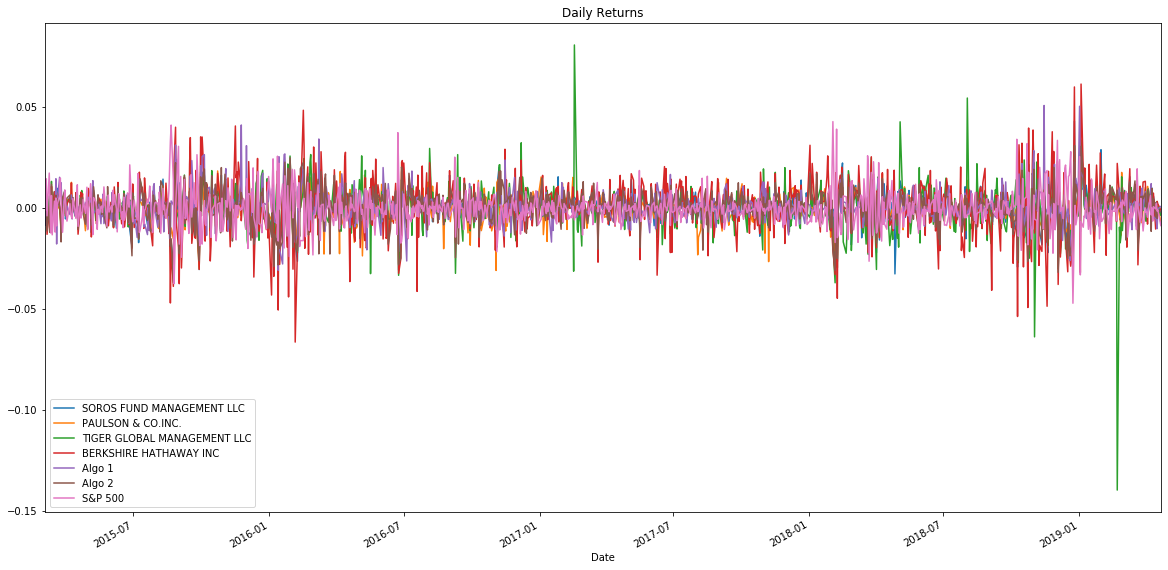

In [247]:
#Portfolio Analysis
#In this section, you will calculate and visualize performance and risk metrics for the portfolios.

#Performance
#Calculate and Plot the daily returns and cumulative returns.

# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(20,10), title= "Daily Returns")


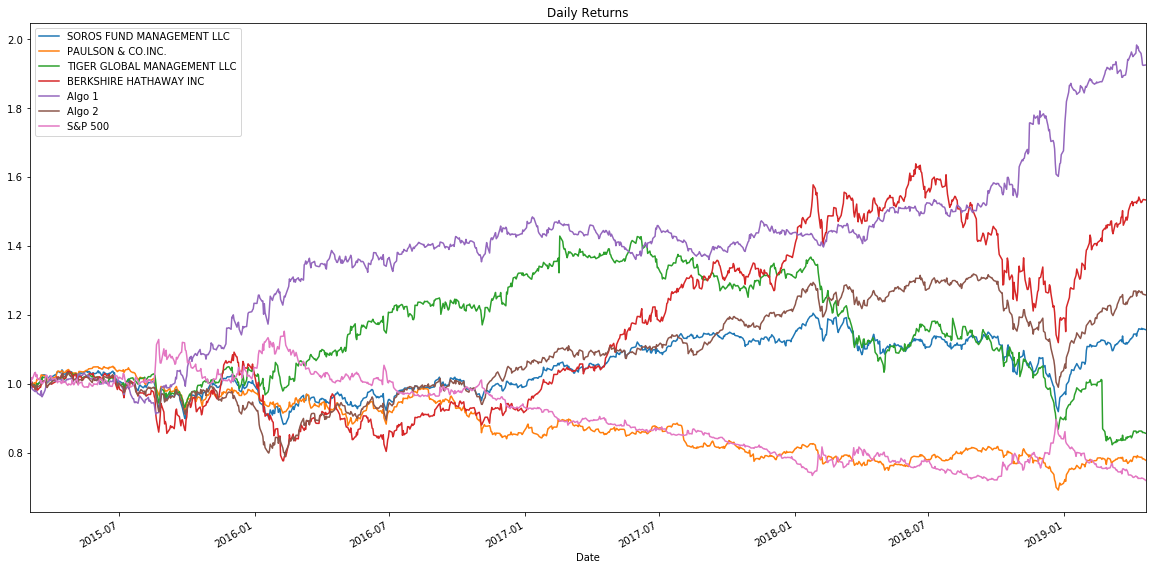

In [249]:
# Plot cumulative returns
# YOUR CODE HERE

#joined_data_rows.plot(sum)

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10), title= "Daily Returns")





In [207]:
#Risk
#Determine the risk of each portfolio:

#Create a box plot for each portfolio.
#Calculate the standard deviation for all portfolios
#Determine which portfolios are riskier than the S&P 500
#Calculate the Annualized Standard Deviation
# Calculate the annualized standard deviation (252 trading days)

# Reading whale returns
#whale_returns_csv = Path("../Financial analysis/whale_returns.csv")
# Reading algorithmic returns
#algo_returns_csv = Path("../Financial analysis/algo_returns.csv")
# Reading S&P 500 Closing Prices
#sp500_history_csv = Path("../Financial analysis//sp500_history.csv")

#portfolio_a = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
#portfolio_b = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
#portafolio_c = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)





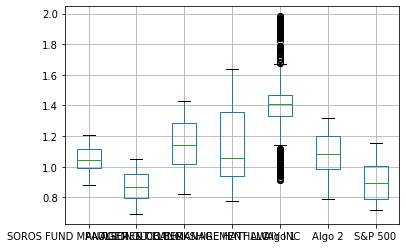

In [250]:

# Box plot to visually show risk
# YOUR CODE HERE


cumulative_returns.boxplot()

In [253]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE


Standard_Deviations = combined_df.std()
Standard_Deviations.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

In [210]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE


In [256]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE


my_portafolio_std_annual = daily_returns.std() * np.sqrt(252)

my_portafolio_std_annual

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta.

Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

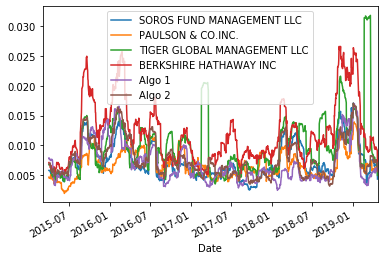

In [257]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

daily_returns.rolling(window=21).std().plot()

In [213]:
# Correlation
# YOUR CODE HERE
correlation = daily_returns.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [258]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499


In [260]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

covariance = daily_returns['whale_df'].cov(daily_returns['S&P 500']
covariance = daily_returns['algo_df'].cov(daily_returns['S&P 500']                                              
covariance = daily_returns['sp500_df'].cov(daily_returns['S&P 500']
covariance.head()
                                              
   

SyntaxError: invalid syntax (<ipython-input-260-2a5aa034fa23>, line 5)

Challenge: Exponentially Weighted Average

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.


In [90]:
#Try calculating the ewm with a 21 day half-life.

Sharpe Ratios

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [91]:
# Reading whale returns
whale_returns_csv = Path("../Financial analysis/whale_returns.csv")
# Reading algorithmic returns
algo_returns_csv = Path("../Financial analysis/algo_returns.csv")
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Financial analysis//sp500_history.csv")

portfolio_a = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
portfolio_b = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
portafolio_c = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)




In [92]:
# Calculate daily returns
portfolio_a_returns = portfolio_a.pct_change().dropna()
portfolio_b_returns = portfolio_b.pct_change().dropna()
portfolio_c_returns = portfolio_b.pct_change().dropna()

# Concat returns into one DataFrame
all_portfolios_returns = pd.concat([portfolio_a_returns, portfolio_b_returns, portfolio_c_returns], axis='columns', join='inner')
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Algo 1,Algo 2
Date,,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.098917,-1.113716
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-0.744524,-10.327163


In [93]:
all_portfolios_returns.isnull().sum()
all_portfolios_returns.dropna(inplace = True)
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Algo 1,Algo 2
Date,,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.098917,-1.113716
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-0.744524,-10.327163


In [94]:
# Calculate Sharpe Ratio
sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.747648
Algo 2                         0.270765
Algo 1                        -0.747648
Algo 2                         0.270765
dtype: float64

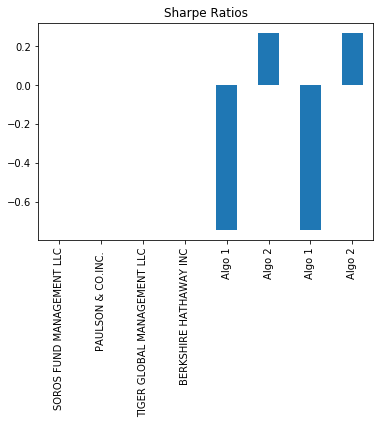

In [95]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")